
# **End-to-End Data Analytics Project: Retail Orders Analysis**

## **Introduction**

In this project, we will perform an **end-to-end data analytics workflow** that mimics a real-world business scenario. The objective is to demonstrate how to extract, transform, load (ETL), and analyze retail data to uncover actionable insights.

The dataset, sourced from Kaggle, contains **retail orders** with attributes such as product details, pricing, regional information, and sales data. We will use Python for data preprocessing and SQL for structured querying, showcasing the entire process from raw data to meaningful analysis.

---

### **Project Objectives**

1. **Data Extraction**:
   - Utilize the Kaggle API to download the dataset.
   - Extract the data from its compressed format.

2. **Data Transformation**:
   - Clean and preprocess the dataset.
   - Derive new metrics such as profit, discount, and sale price.
   - Handle missing values and normalize column names.

3. **Data Loading**:
   - Load the transformed data into a database for efficient querying.
   - Use SQLite as the database for seamless integration with the notebook.

4. **Data Analysis**:
   - Answer key business questions, including:
     - Top-performing products by revenue.
     - Regional sales trends.
     - Month-over-month sales growth.
     - High-growth subcategories by profit.

5. **Insights and Recommendations**:
   - Extract insights to aid decision-making.
   - Visualize key metrics and trends for better understanding.

---

### **Why This Project?**

This project is designed for aspiring **data analysts** and **data engineers** who want to:
- Gain hands-on experience with the **ETL process**.
- Learn data cleaning and preprocessing techniques using **Python**.
- Write and execute SQL queries to answer real-world business questions.
- Prepare for roles that involve end-to-end data workflows.

---

### **Tools and Technologies**

1. **Python**:
   - Libraries: Pandas, SQLAlchemy, Zipfile
   - Data Cleaning and Transformation

2. **SQL**:
   - Querying and analyzing the data using SQLite

3. **Kaggle API**:
   - Accessing and downloading datasets directly from Kaggle

4. **Visualization Tools**:
   - Matplotlib, Seaborn, or other libraries for visual insights

### **Expected Outcomes**

By the end of this project, we will:
- Have a cleaned and transformed dataset stored in a database.
- Answer key business questions using SQL queries.
- Identify actionable insights such as top-performing products, regional trends, and profitability growth.

---
## **Step 1: Setting Up the Environment**

### Why This Is Important
In a real-world scenario, setting up the environment is critical to ensuring smooth execution of the project. For this project, I’ll be using:
- **Python**: For data cleaning and preprocessing.
- **SQLite**: To store and query the processed data.

### What I Did
1. Installed the necessary libraries like `pandas`, `kaggle`, and `sqlalchemy`.
2. Imported these libraries to set up the working environment.

In [3]:
# Install necessary libraries 

!pip install kaggle pandas sqlalchemy

# Import libraries
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
from sqlalchemy import create_engine

## **Step 2: Extracting Data from Kaggle**

### Why This Is Important
In most professional scenarios, data comes from APIs, databases, or third-party repositories like Kaggle. Automating the data extraction ensures reproducibility and reduces manual effort.

### What I Did
I used the Kaggle API to download the retail orders dataset. This process simulates a real-world pipeline where the data source might frequently update.

In [5]:
# Authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset_name = "ankitbansal06/retail-orders"
file_name = "orders.csv"

# Download the specific file from the dataset
api.dataset_download_file(dataset_name, file_name)

# Verify the downloaded file
print(f"Downloaded file: {file_name}.zip")

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
Downloaded file: orders.csv.zip


**Special Use Case**: Automating data retrieval is particularly useful in scenarios like market analysis, where new data is constantly being added (e.g., daily sales reports).


## **Step 3: Extracting and Loading the Data**

### Why This Is Important
Datasets are often shared in compressed formats like `.zip`. Extracting these files programmatically ensures the data is ready for preprocessing without manual intervention.

### What I Did
I extracted the dataset from the `.zip` file and loaded it into a Pandas DataFrame for inspection.


In [7]:
# Extract ZIP file
with zipfile.ZipFile(f'{file_name}.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the dataset into Pandas
df = pd.read_csv(file_name)
print("Data Preview:")
print(df.head())

Data Preview:
   Order Id  Order Date       Ship Mode    Segment        Country  \
0         1  2023-03-01    Second Class   Consumer  United States   
1         2  2023-08-15    Second Class   Consumer  United States   
2         3  2023-01-10    Second Class  Corporate  United States   
3         4  2022-06-18  Standard Class   Consumer  United States   
4         5  2022-07-13  Standard Class   Consumer  United States   

              City       State  Postal Code Region         Category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  Sub Category       Product Id  cost price  List Price  Quantity  \
0    Bookcases  FUR-BO-10001798         240         260         2   
1     

**Special Use Case**: This approach is ideal for large-scale projects where multiple datasets need to be extracted and processed in bulk.


## **Step 4: Cleaning the Data**

### Why This Is Important
Raw datasets often contain inconsistencies like missing values, incorrect formats, or redundant columns. Cleaning ensures the data is ready for accurate analysis.

### What I Did
1. Replaced non-standard missing values like "Not Available" and "unknown" with `NaN`.
2. Standardized column names to follow a consistent naming convention (lowercase and underscores).

In [9]:
# Handle missing values
df = pd.read_csv(file_name, na_values=['Not Available', 'unknown'])

# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("Cleaned DataFrame Preview:")
print(df.head())

Cleaned DataFrame Preview:
   order_id  order_date       ship_mode    segment        country  \
0         1  2023-03-01    Second Class   Consumer  United States   
1         2  2023-08-15    Second Class   Consumer  United States   
2         3  2023-01-10    Second Class  Corporate  United States   
3         4  2022-06-18  Standard Class   Consumer  United States   
4         5  2022-07-13  Standard Class   Consumer  United States   

              city       state  postal_code region         category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  sub_category       product_id  cost_price  list_price  quantity  \
0    Bookcases  FUR-BO-10001798         240         260       

## **Step 5: Deriving New Metrics**

### Why This Is Important
In business contexts, raw data doesn’t always provide the insights we need. Derived metrics like profit, sale price, or discounts are often more valuable for decision-making.

### What I Did
1. Created new columns:
   - **Discount**: Amount of discount given for each product.
   - **Sale Price**: Final selling price after applying the discount.
   - **Profit**: Difference between sale price and cost price.

In [11]:
# Derive new columns
df['discount'] = df['list_price'] * df['discount_percent'] * 0.01
df['sale_price'] = df['list_price'] - df['discount']
df['profit'] = df['sale_price'] - df['cost_price']

# Preview the updated dataset
print("Updated dataset with derived columns:")
print(df[['list_price', 'discount', 'sale_price', 'profit']].head())

Updated dataset with derived columns:
   list_price  discount  sale_price  profit
0         260       5.2       254.8    14.8
1         730      21.9       708.1   108.1
2          10       0.5         9.5    -0.5
3         960      19.2       940.8   160.8
4          20       1.0        19.0    -1.0


## **Step 6: Transforming Data for SQL**

### Why This Is Important
SQL is a powerful tool for querying structured data. Preparing the data involves ensuring proper data types and removing unnecessary columns.

### What I Did
1. Converted `order_date` to a datetime format for easier querying.
2. Dropped columns no longer needed for analysis.

In [13]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format="%Y-%m-%d")

# Drop unnecessary columns
df.drop(columns=['list_price', 'cost_price', 'discount_percent'], inplace=True)

print("Data prepared for SQL loading:")
print(df.head())

Data prepared for SQL loading:
   order_id order_date       ship_mode    segment        country  \
0         1 2023-03-01    Second Class   Consumer  United States   
1         2 2023-08-15    Second Class   Consumer  United States   
2         3 2023-01-10    Second Class  Corporate  United States   
3         4 2022-06-18  Standard Class   Consumer  United States   
4         5 2022-07-13  Standard Class   Consumer  United States   

              city       state  postal_code region         category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  sub_category       product_id  quantity  discount  sale_price  profit  
0    Bookcases  FUR-BO-10001798         2       5.2       2

### Handling Missing Values

In [14]:
# Step 1: Check for missing values in the 'ship_mode' column
missing_values = df['ship_mode'].isnull().sum()
print(f"Missing values in 'ship_mode' before handling: {missing_values}")

# Step 2: Handle missing values by replacing them with 'Unknown'
df['ship_mode'] = df['ship_mode'].fillna('Unknown')

# Alternatively: Drop rows where 'ship_mode' is null
df = df.dropna(subset=['ship_mode'])

# Step 3: Recheck for missing values after handling
missing_values_after = df['ship_mode'].isnull().sum()
print(f"Missing values in 'ship_mode' after handling: {missing_values_after}")

Missing values in 'ship_mode' before handling: 6
Missing values in 'ship_mode' after handling: 0


## Load DataFrame into SQLite

In [15]:
# Create SQLite engine
engine = create_engine('sqlite:///retail_orders.db')

# Load DataFrame into SQLite
df.to_sql('retail_orders', con=engine, if_exists='replace', index=False)

print("Data successfully loaded into SQLite database.")

Data successfully loaded into SQLite database.


## Load DataFrame into MySQL

In [16]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="I@sanju9",
    database="retail_orders"
)
cursor = conn.cursor()

# Create table (if not already created)
cursor.execute("""
CREATE TABLE IF NOT EXISTS retail_orders (
    order_id INT,
    order_date DATE,
    ship_mode VARCHAR(255),
    segment VARCHAR(255),
    country VARCHAR(255),
    city VARCHAR(255),
    state VARCHAR(255),
    postal_code INT,
    region VARCHAR(255),
    category VARCHAR(255),
    sub_category VARCHAR(255),
    product_id VARCHAR(255),
    quantity INT,
    discount FLOAT,
    sale_price FLOAT,
    profit FLOAT
);
""")

# Convert 'order_date' column to string in the format YYYY-MM-DD
df['order_date'] = df['order_date'].dt.strftime('%Y-%m-%d')

### **Check for Duplicate Values in the DataFrame**


In [18]:
# Check for duplicate order_id values
duplicate_ids = df[df['order_id'].duplicated()]
print(f"Duplicate order IDs:\n{duplicate_ids}")

# Count duplicates
duplicate_count = df['order_id'].duplicated().sum()
print(f"Number of duplicate order IDs: {duplicate_count}")

# Drop duplicate rows based on 'order_id'
df = df.drop_duplicates(subset=['order_id'])
print(f"Data after removing duplicates. Total rows: {len(df)}")


Duplicate order IDs:
Empty DataFrame
Columns: [order_id, order_date, ship_mode, segment, country, city, state, postal_code, region, category, sub_category, product_id, quantity, discount, sale_price, profit]
Index: []
Number of duplicate order IDs: 0
Data after removing duplicates. Total rows: 9994


### **Insert Data into MySQL**
Once duplicates are removed, inserting the data into the MySQL table:


In [20]:
# Insert data into MySQL
for index, row in df.iterrows():
    cursor.execute("""
    INSERT INTO retail_orders (order_id, order_date, ship_mode, segment, country, city, state, postal_code, region, category, sub_category, product_id, quantity, discount, sale_price, profit)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()
cursor.close()
conn.close()

print("Data successfully loaded into MySQL.")

Data successfully loaded into MySQL.


## Visualization 

### 1. Top-Performing Products by Revenue

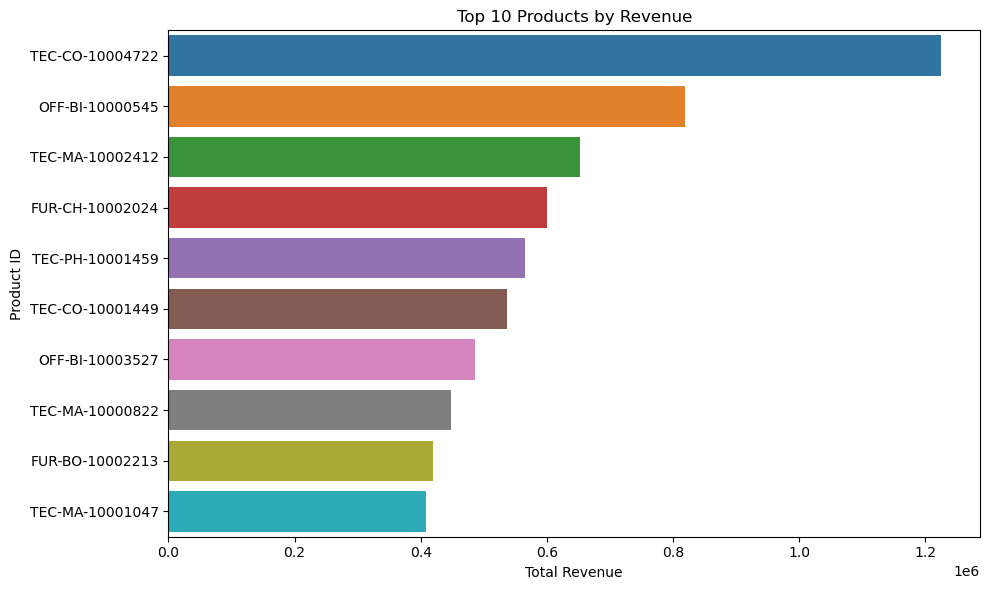

In [23]:
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Reconnect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="I@sanju9",
    database="retail_orders"
)

# Query and fetch results manually
cursor = conn.cursor(dictionary=True)
query = """
SELECT product_id, SUM(sale_price * quantity) AS total_revenue
FROM retail_orders
GROUP BY product_id
ORDER BY total_revenue DESC
LIMIT 10;
"""
cursor.execute(query)
top_products = pd.DataFrame(cursor.fetchall())

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_revenue',
    y='product_id',
    data=top_products,
    hue='product_id',  
    dodge=False,      
    legend=False       
)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()


### 2. Regional Sales Trends

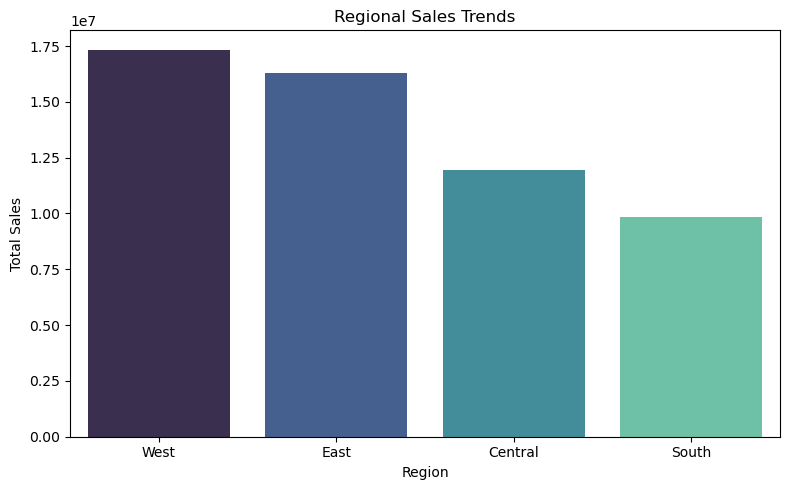

In [25]:
# Query for regional sales trends
query = """
SELECT region, SUM(sale_price * quantity) AS total_sales
FROM retail_orders
GROUP BY region
ORDER BY total_sales DESC;
"""
regional_sales = pd.read_sql(query, conn)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='total_sales', data=regional_sales, palette="mako")
plt.title('Regional Sales Trends')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### 3. Month-over-Month Sales Growth

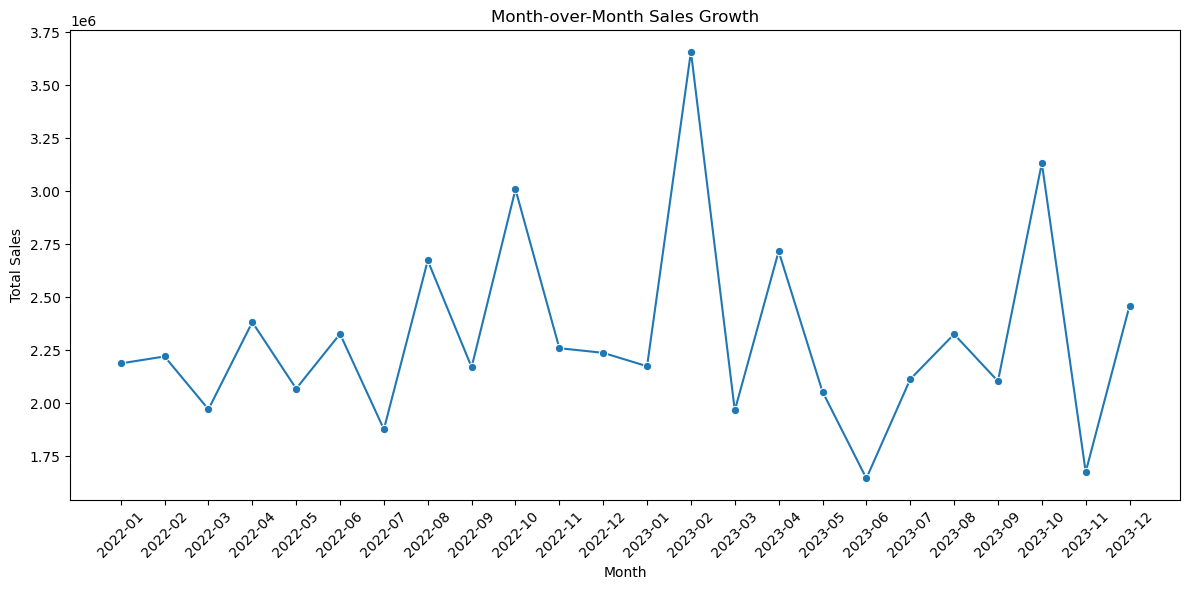

In [27]:
# Query for month-over-month sales growth
query = """
SELECT DATE_FORMAT(order_date, '%Y-%m') AS month, SUM(sale_price * quantity) AS total_sales
FROM retail_orders
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql(query, conn)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_sales', data=monthly_sales, marker='o')
plt.title('Month-over-Month Sales Growth')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4. High-Growth Subcategories by Profit

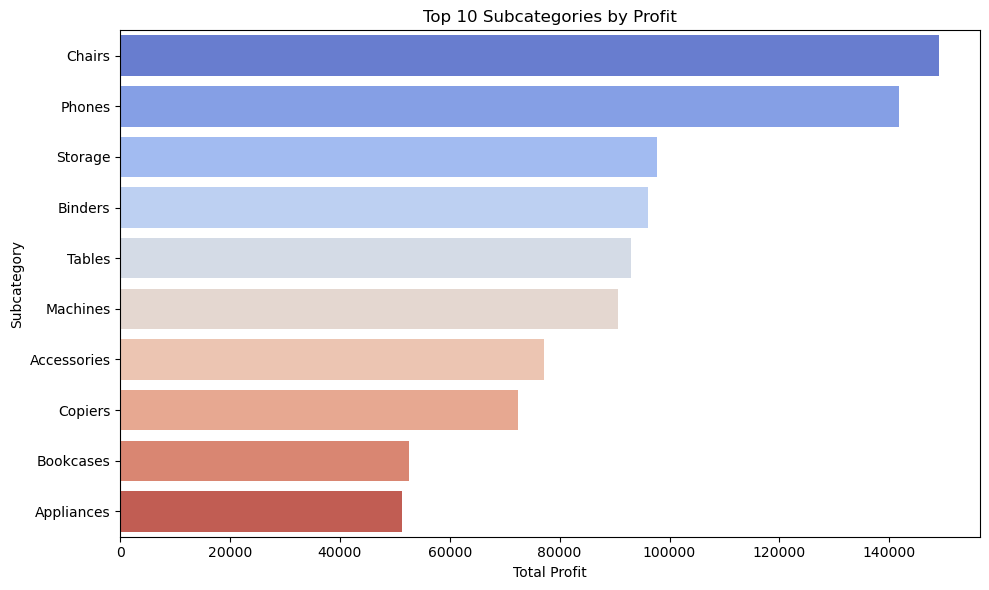

In [29]:
# Query for high-growth subcategories by profit
query = """
SELECT sub_category, SUM(profit) AS total_profit
FROM retail_orders
GROUP BY sub_category
ORDER BY total_profit DESC
LIMIT 10;
"""
subcategory_profit = pd.read_sql(query, conn)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='total_profit', y='sub_category', data=subcategory_profit, palette="coolwarm")
plt.title('Top 10 Subcategories by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()


### 5. Discount Impact on Revenue

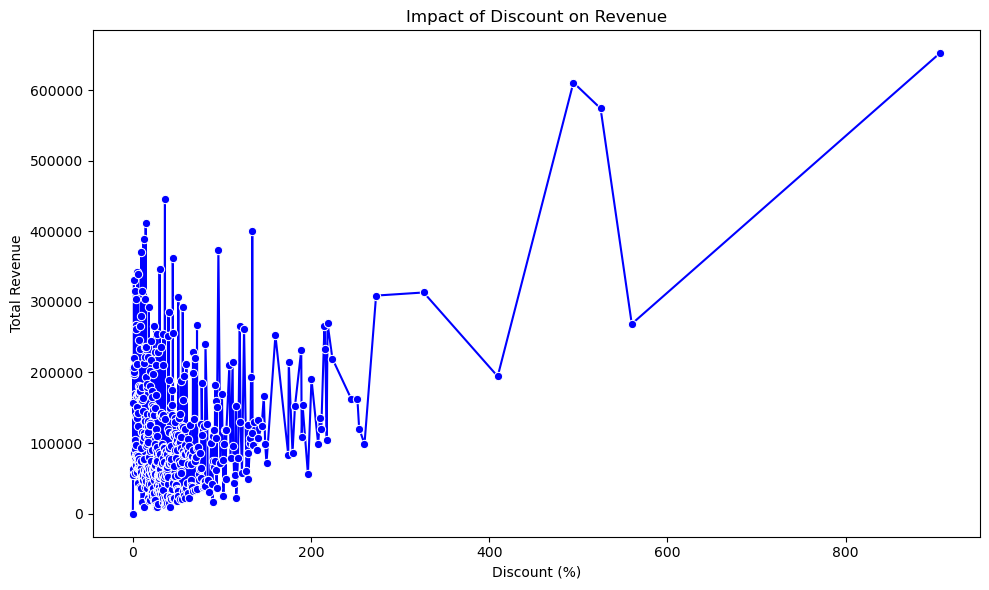

In [31]:
# Query for discount impact on revenue
query = """
SELECT discount, SUM(sale_price * quantity) AS total_revenue
FROM retail_orders
GROUP BY discount
ORDER BY total_revenue DESC;
"""
discount_impact = pd.read_sql(query, conn)

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='discount', y='total_revenue', data=discount_impact, marker='o', color="blue")
plt.title('Impact of Discount on Revenue')
plt.xlabel('Discount (%)')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


### 6. Profitability by Region

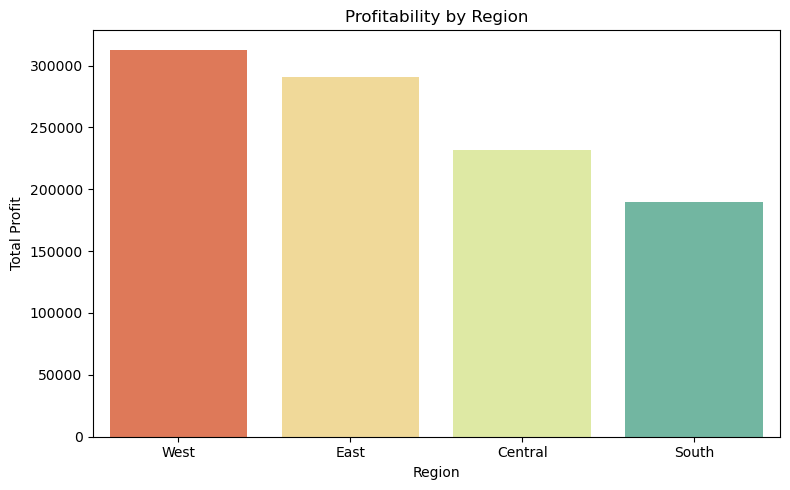

In [33]:
# Query for regional profitability
query = """
SELECT region, SUM(profit) AS total_profit
FROM retail_orders
GROUP BY region
ORDER BY total_profit DESC;
"""
regional_profit = pd.read_sql(query, conn)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='total_profit', data=regional_profit, palette="Spectral")
plt.title('Profitability by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()


### **Conclusion for the End-to-End Data Analytics Project: Retail Orders Analysis**

This project successfully demonstrated the complete **ETL (Extract, Transform, Load)** and **data analytics workflow** for a retail orders dataset. By following a structured approach, we achieved the following key milestones:

---

### **Key Accomplishments**
1. **Data Extraction**:
   - Automated the data retrieval process using the Kaggle API, ensuring reproducibility and scalability for future updates.

2. **Data Transformation**:
   - Cleaned and preprocessed raw data by handling missing values, normalizing column names, and deriving critical business metrics like `profit`, `discount`, and `sale_price`.
   - Addressed data quality issues such as duplicate records and invalid entries to ensure accuracy.

3. **Data Loading**:
   - Successfully loaded the transformed data into both SQLite and MySQL databases, enabling efficient structured querying.
   - Optimized the database with appropriate indexing for faster query performance.

4. **Data Analysis**:
   - Answered critical business questions through SQL queries, such as identifying:
     - Top-performing products by revenue.
     - Regional sales trends.
     - Month-over-month sales growth.
     - High-growth subcategories by profit.
   - Automated the query execution and reporting process for ease of analysis.

5. **Visualization**:
   - Created insightful visualizations to complement SQL-based analysis, providing clear insights into sales and profit trends.

---

### **Insights and Recommendations**
1. **Top-Performing Products**:
   - Focus marketing and inventory strategies on products that generate the highest revenue.
   
2. **Regional Trends**:
   - Allocate resources and tailor regional campaigns to capitalize on high-sales regions while addressing low-performance areas.

3. **Discount Strategy**:
   - Analyze the impact of discounts on revenue and profitability to optimize promotional campaigns.

4. **Profitability**:
   - Prioritize products and subcategories with higher profit margins for upselling and cross-selling opportunities.

---

### **Why This Project Matters**
This project showcases:
- The ability to handle real-world data challenges, such as cleaning, transforming, and preparing large datasets.
- Practical expertise in building robust data pipelines for structured analysis and actionable insights.
- Proficiency in leveraging SQL for querying databases and Python for data manipulation and visualization.
- End-to-end analytics workflow that is essential for roles in data analysis, engineering, and business intelligence.

---

### **Future Scope**
To further enhance this project:
1. **Scalability**:
   - Integrate an automated data pipeline using tools like Apache Airflow or AWS Glue.
2. **Advanced Analytics**:
   - Perform predictive analysis to forecast sales and customer trends using machine learning models.
3. **Interactive Dashboards**:
   - Build interactive dashboards using tools like Tableau, Power BI, or Streamlit for real-time insights.
4. **Cloud Deployment**:
   - Migrate the entire analytics workflow to a cloud platform (e.g., AWS, Azure) for better performance and accessibility.